In [54]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [126]:
img =  cv2.imread('./Model/test_images/036_5e0af3bf.jpg')

img.shape

(474, 474, 3)

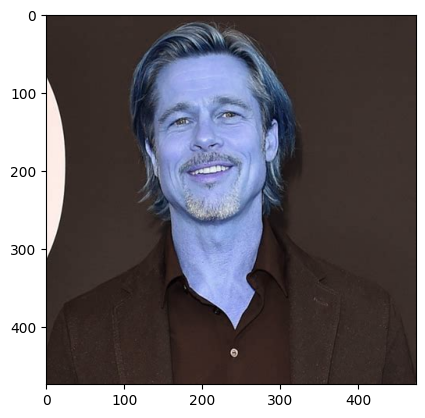

In [127]:
plt.imshow(img)

In [128]:
# making it a gray image

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape 

(474, 474)

In [129]:
gray

array([[44, 44, 44, ..., 47, 47, 47],
       [43, 43, 43, ..., 47, 47, 47],
       [42, 42, 42, ..., 47, 47, 47],
       ...,
       [33, 34, 36, ..., 38, 37, 37],
       [70, 34, 38, ..., 40, 36, 71],
       [70, 34, 38, ..., 40, 36, 71]], dtype=uint8)

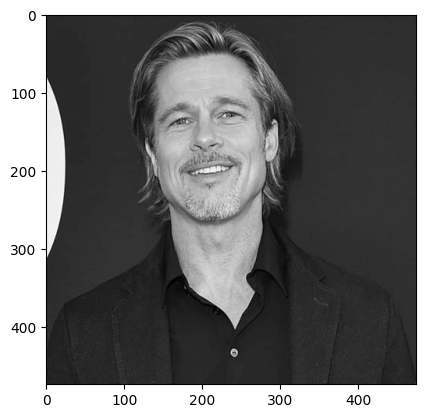

In [130]:
plt.imshow(gray, cmap='gray')

In [131]:
face_cascade = cv2.CascadeClassifier('./Model/Open_CV/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./Model/Open_CV/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)

faces


array([[108,  53, 199, 199]])

In [132]:
(x,y,w,h) = faces[0]
x,y,w,h

(108, 53, 199, 199)

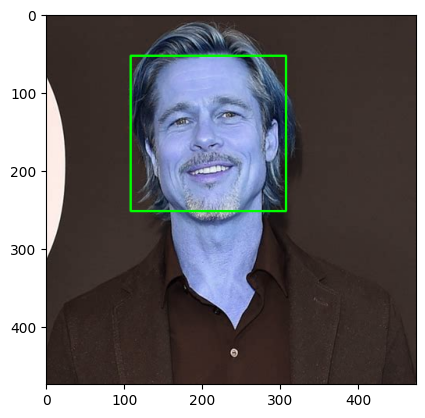

In [133]:
face_img = cv2.rectangle(img,(x,y),(x+w, y+h),(0,255,0),2)
plt.imshow(face_img)

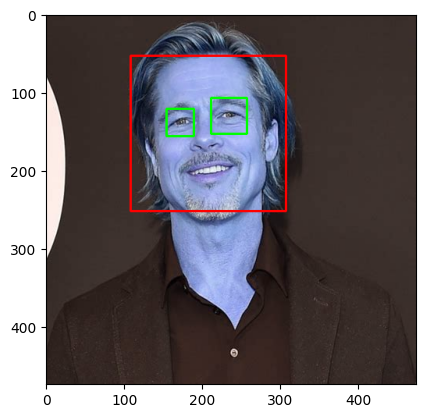

In [ ]:

# Detecting face and Eye 

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)  
    

   
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2) 


# plt.figure()
plt.imshow(face_img, cmap ='gray')
# plt.show()


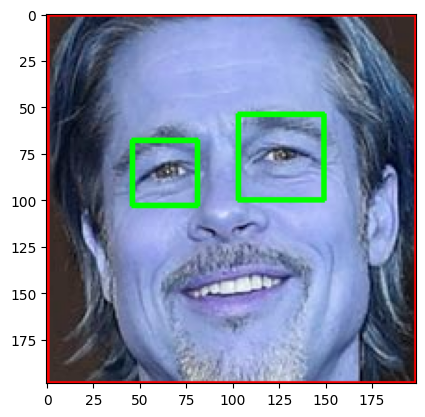

In [169]:
#cropping the image
%matplotlib inline  
plt.imshow(roi_color, cmap ='gray')

In [170]:
# Function

def get_cropped_image(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = img[y:y + h, x:x + w]

        eyes = eye_cascade.detectMultiScale(roi_gray)

        if len(eyes)>2:
            return roi_color

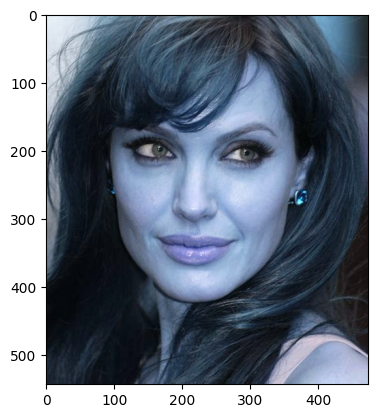

In [171]:
original_img = cv2.imread('./Model/test_images/051_268fdfd7.jpg')

plt.imshow(original_img)

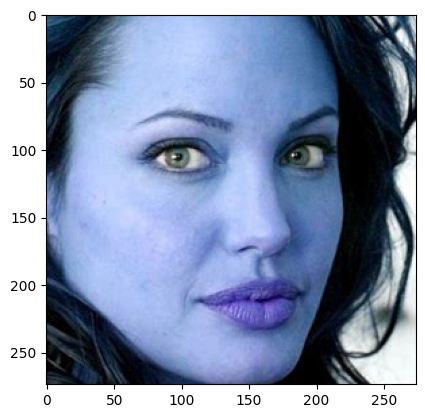

In [181]:
cropped_img = get_cropped_image('./Model/test_images/050_7c5b026c.jpg')

plt.imshow(cropped_img)

In [216]:
path_to_data = './Model/Dataset/'
path_to_cr_data ='./Model/cropped_images/'


In [217]:
import os
img_dirs = []

for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

img_dirs

['./Model/Dataset/Angelina_Jolie',
 './Model/Dataset/Brad_Pitt',
 './Model/Dataset/Denzel_Washington',
 './Model/Dataset/Hugh_Jackman',
 './Model/Dataset/Jennifer_Lawrence',
 './Model/Dataset/Johnny_Depp',
 './Model/Dataset/Kate_Winslet',
 './Model/Dataset/Leonardo_iCaprio',
 './Model/Dataset/Megan_Fox',
 './Model/Dataset/Natalie_Portman',
 './Model/Dataset/Nicole_Kidman',
 './Model/Dataset/Robert_Downey Jr',
 './Model/Dataset/Sandra_Bullock',
 './Model/Dataset/Scarlett_Johansson',
 './Model/Dataset/Tom_Cruise',
 './Model/Dataset/Tom_Hanks',
 './Model/Dataset/Will_Smith']

In [218]:
import shutil

if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)

os.makedirs(path_to_cr_data)

In [ ]:
cropped_img_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []


    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image(entry.path)
         
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_img_dirs.append(cropped_folder)
                
                print(cropped_folder)

            cropped_file_name = celebrity_name+str(count)+'.png'
            cropped_file_path = cropped_folder + "/" + cropped_file_name

            cv2.imwrite(cropped_file_path, roi_color)    

            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1


Angelina_Jolie
Brad_Pitt
./Model/cropped_images/Brad_Pitt
Denzel_Washington
./Model/cropped_images/Denzel_Washington
Hugh_Jackman
./Model/cropped_images/Hugh_Jackman
Jennifer_Lawrence
./Model/cropped_images/Jennifer_Lawrence
Johnny_Depp
./Model/cropped_images/Johnny_Depp
Kate_Winslet
./Model/cropped_images/Kate_Winslet
Leonardo_iCaprio
./Model/cropped_images/Leonardo_iCaprio
Megan_Fox
./Model/cropped_images/Megan_Fox
Natalie_Portman
./Model/cropped_images/Natalie_Portman
Nicole_Kidman
./Model/cropped_images/Nicole_Kidman
Robert_Downey Jr
./Model/cropped_images/Robert_Downey Jr
Sandra_Bullock
./Model/cropped_images/Sandra_Bullock
Scarlett_Johansson
./Model/cropped_images/Scarlett_Johansson
Tom_Cruise
./Model/cropped_images/Tom_Cruise
Tom_Hanks
./Model/cropped_images/Tom_Hanks
Will_Smith
./Model/cropped_images/Will_Smith
